<a href="https://colab.research.google.com/github/Rohit484/work-/blob/master/ChatBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install langgraph langsmith
!pip install langgraph


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.6/142.6 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 4.0 MB/s eta 0:00:00


In [9]:
!pip install langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.0 MB/s eta 0:00:00


In [2]:
from google.colab import userdata
groq_api_key=userdata.get('groq_api_key')
langsmith=userdata.get('LANGSMITH_API_KEY')
print(langsmith)

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


In [3]:
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="CourseLanggraph"

In [10]:
from langchain_groq import ChatGroq

In [16]:
llm=ChatGroq(groq_api_key=groq_api_key,model_name="gemma2-9b-it")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7a78b9d4a010>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7a78b9e8d610>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

Start Building Chatbot Using Langgraph

In [20]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [22]:
class State(TypedDict):
  # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)


In [23]:
graph_builder

In [25]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [26]:
graph_builder.add_node("chatbot",chatbot)

In [27]:
graph_builder

In [28]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [29]:
graph=graph_builder.compile()

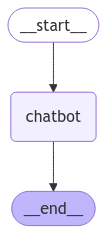

In [30]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [31]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)

User: Who is President of USA
dict_values([{'messages': AIMessage(content='The current President of the United States of America is **Joe Biden**. \n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 14, 'total_tokens': 32, 'completion_time': 0.032727273, 'prompt_time': 7.6919e-05, 'queue_time': 0.020401921, 'total_time': 0.032804192}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-c00be948-b3fe-477b-9927-9d307d5f6d68-0', usage_metadata={'input_tokens': 14, 'output_tokens': 18, 'total_tokens': 32})}])
content='The current President of the United States of America is **Joe Biden**. \n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 14, 'total_tokens': 32, 'completion_time': 0.032727273, 'prompt_time': 7.6919e-05, 'queue_time': 0.020401921, 'total_time': 0.032804192}, 'model_name': 'gemma2-9b-it', 'system_fingerpri